In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
Data=pd.read_csv('Titanic_DataSet.csv')

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data.shape

(891, 12)

In [5]:
Data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in the age column
687 in cabin column
and 2 in embarked column 

We can drop the cabin column

In [9]:
Data.drop(columns="Cabin",axis=1,inplace=True)

Replacing the null values in the age column with the average value

In [10]:
Data['Age'].fillna(Data['Age'].mean(),inplace=True)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\3592893020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(Data['Age'].mean(),inplace=True)


Replacing the null values in the embarked column with the frequently occuring value

In [13]:
Data['Embarked'].fillna(Data['Embarked'].mode()[0],inplace=True)

Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#identifying duplicated data 
Data.duplicated().sum()

0

Idenifying survival status of the passengers

In [15]:
Data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
Data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Survival Count Visualization

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\3046506298.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=Data,palette='viridis',)


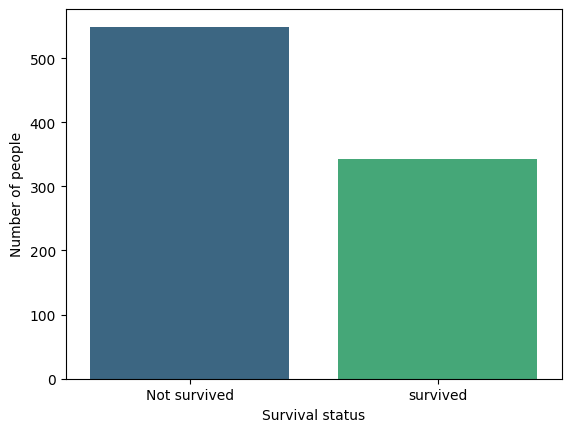

In [17]:
sns.countplot(x='Survived',data=Data,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

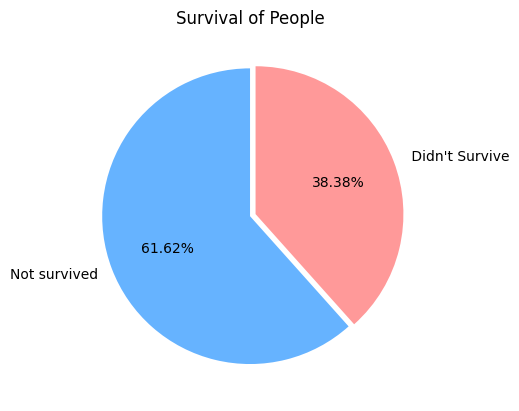

In [26]:
plt.pie(Data['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived'," Didn't Survive"],startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Survival of People')
plt.show()


Gender based survival Satistics

In [27]:
Data['Sex'].unique()


array(['male', 'female'], dtype=object)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\4269702001.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=Data,palette='viridis',)


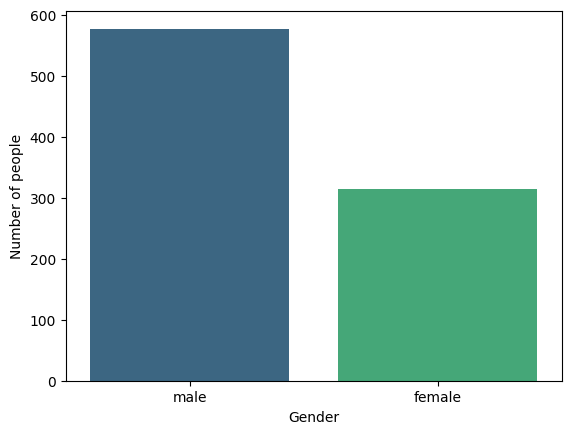

In [28]:
sns.countplot(x='Sex',data=Data,palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

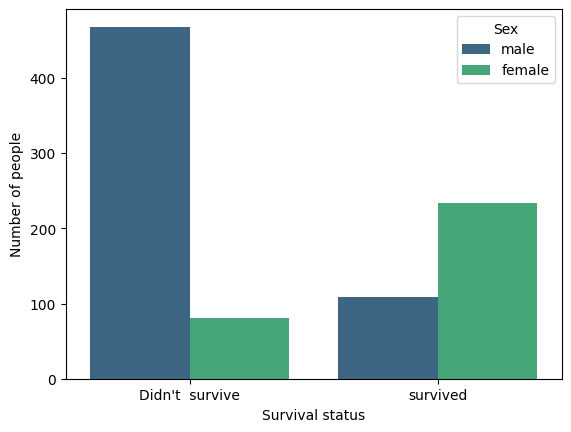

In [29]:
#Using hue to add a second dimension to the survival statistics
sns.countplot(x='Survived',hue='Sex',data=Data,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=["Didn't  survive",'survived'])
plt.show()

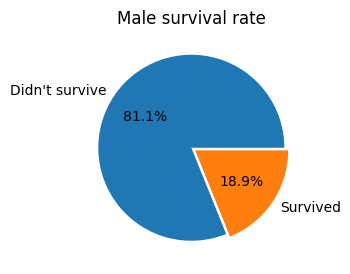

In [34]:
Data[Data['Sex'] == 'male'].Survived.groupby(Data.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Didn't survive","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

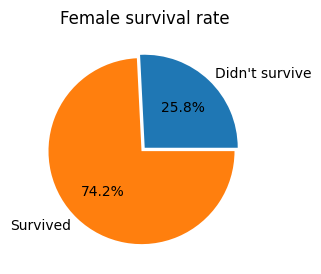

In [35]:
Data[Data['Sex'] == 'female'].Survived.groupby(Data.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Didn't survive","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

Observation : Survival rate of women was much higher compared to men

Illustrating the passenger count for each ticket class

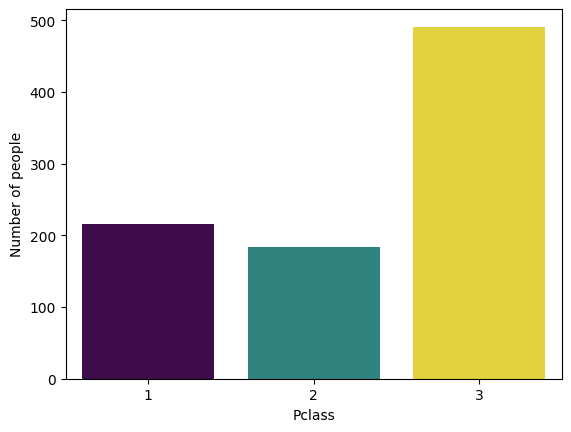

In [40]:
sns.countplot(x='Pclass',data=Data,palette='viridis',legend=False,hue='Pclass')
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

Visualisation of survival segmentated by ticket class

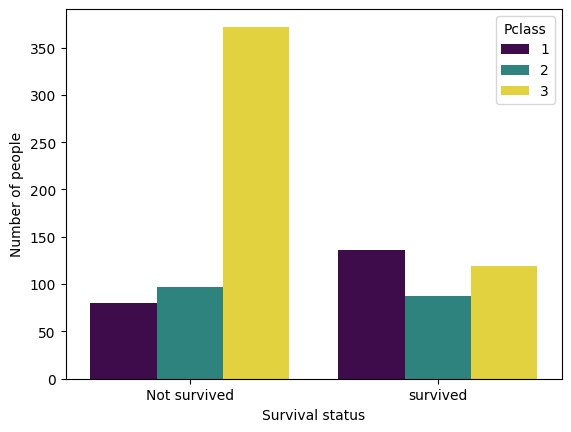

In [41]:
sns.countplot(x='Survived',hue='Pclass',data=Data,palette='viridis')
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Observation : The people with ticket class 3 had the lowest survival rate

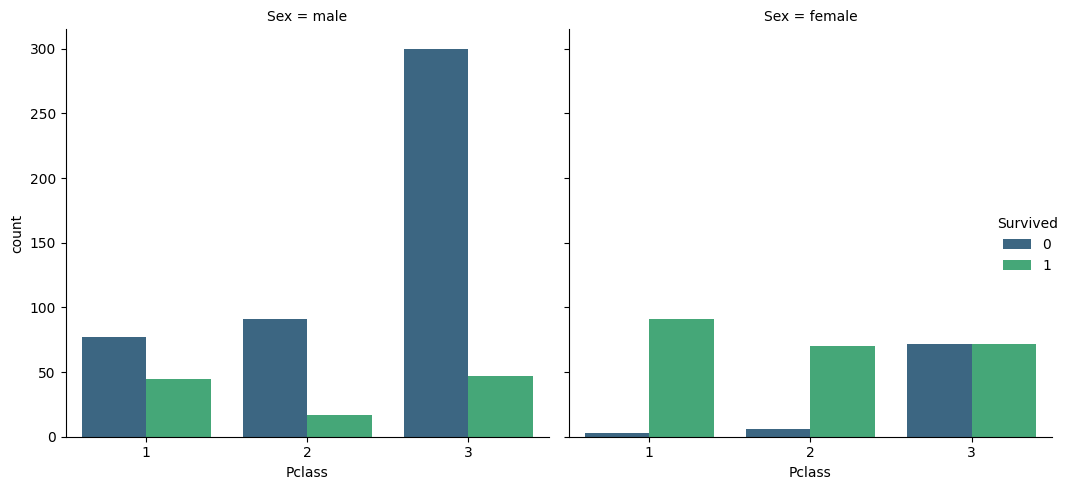

In [42]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =
Data,palette='viridis' )
plt.tight_layout()

Observation: Males of the ticket class 3 had the lowest survival rate

Survival Distribution based on embarkment locations(Ports)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\2765079211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=Data,palette='viridis')


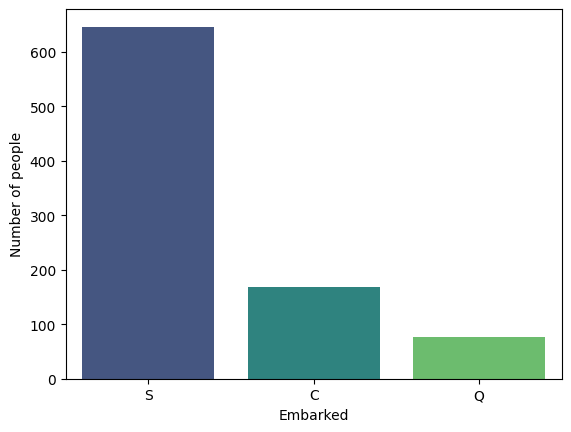

In [48]:
sns.countplot(x='Embarked', data=Data,palette='viridis')
plt.xlabel("Embarked")
plt.ylabel("Number of people")

plt.show()

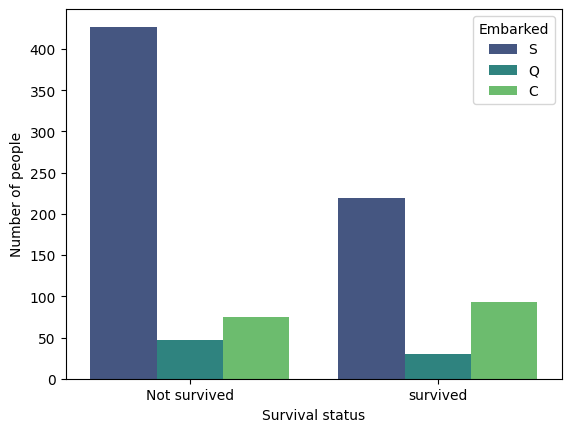

In [49]:
sns.countplot(x='Survived',hue='Embarked',data=Data,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Visualisation of number of siblings/spouses (sibsp) and number of parents/children (parch) on board 

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\2419831786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=Data,ax=axes[0],palette='viridis')
C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\2419831786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch',data=Data,ax=axes[1],palette='viridis')


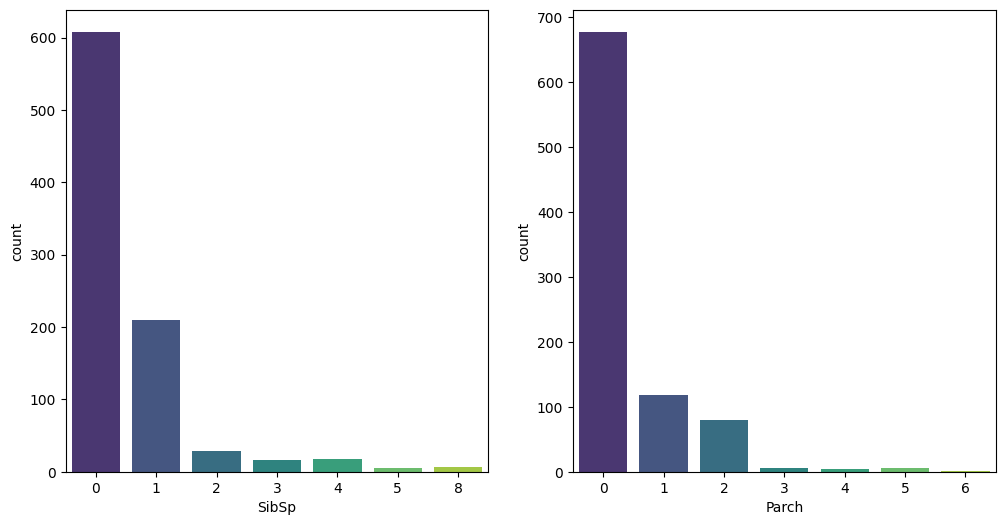

In [53]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=Data,ax=axes[0],palette='viridis')
sns.countplot(x='Parch',data=Data,ax=axes[1],palette='viridis')
plt.show()

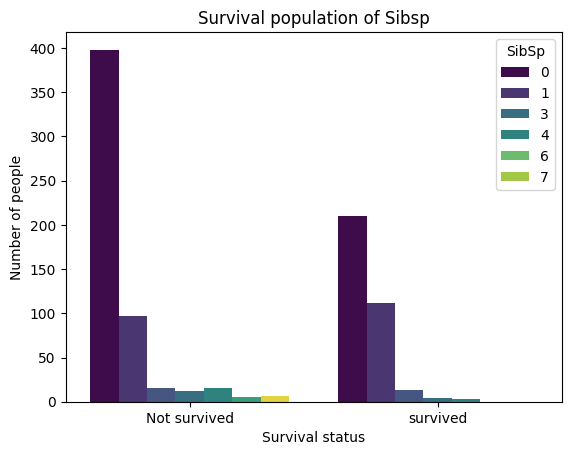

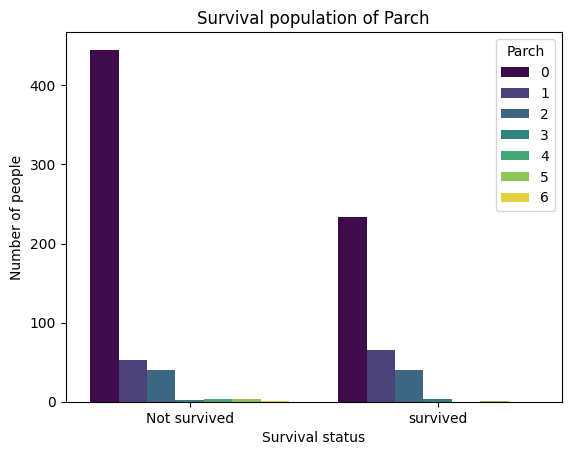

In [54]:
sns.countplot(x ='Survived', hue='SibSp',data=Data,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=Data,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

Fare and Age patters with Kernel Density Estimation(KDE)

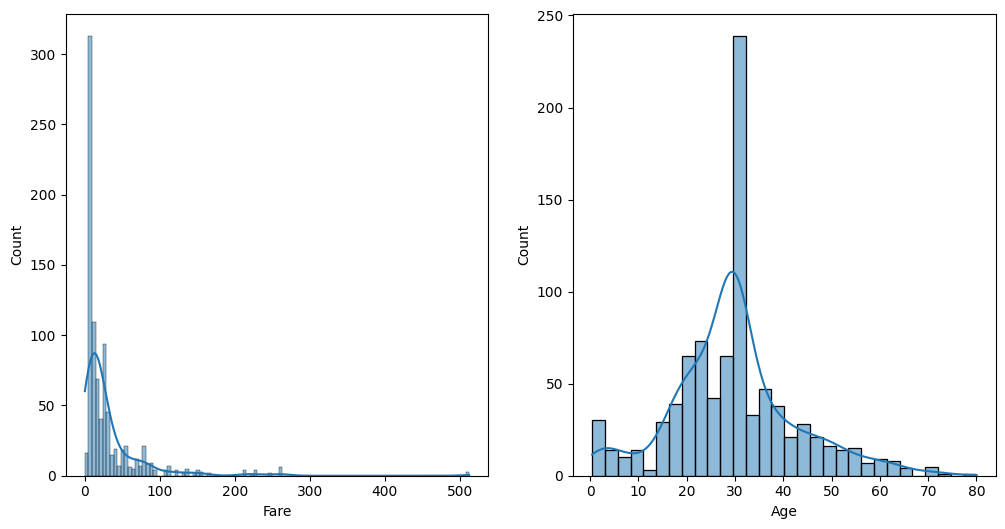

In [57]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(Data['Fare'], kde=True,ax=axes[0])
sns.histplot(Data['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

Illustrating survival rates across different age groups

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2916\2262429768.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot = Data.pivot_table(index="Age_categories", values="Survived")


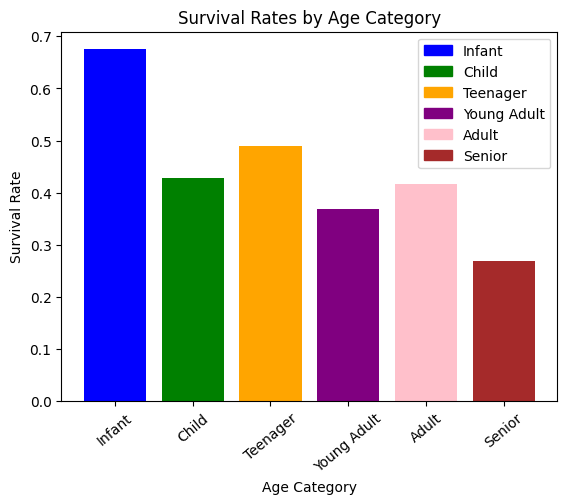

In [60]:
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
Data['Age_categories'] = pd.cut(Data['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = Data.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

Observation : 
* Seniors had the lowest survival rate.
* Infants had the highest survival rate

Analysing Correlation

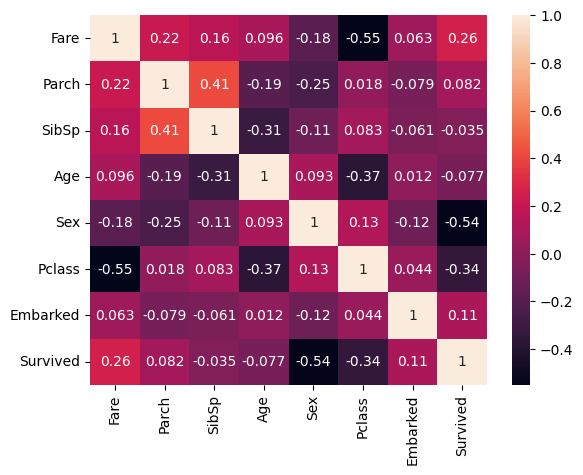

In [62]:
#replacing non numerical values with numerical values to find pairwise correlation between all columns
Data.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

Data.head

Data_num = Data[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

sns.heatmap(Data_num.corr(),annot=True)
plt.show()
     

Obsertvation : Fare,Parch,Sibsp,Age,Sex,Pclass,Embarked columns have correlation with Survival

### Analysis Summary

* **Gender-Based Survival Rates:**
Women exhibited a significantly higher survival rate compared to men. This aligns with the "women and children first" evacuation protocol followed during the Titanic disaster, reflecting the societal norms of the time that prioritized the safety of women and children.

* **Survival Rates by Passenger Class:**
Passengers in Class 3, despite being the largest group, had the lowest survival rates. This suggests a strong link between socio-economic status and survival probability, with higher-class passengers likely having better access to lifeboats and emergency resources.

* **Interaction Between Gender and Passenger Class:**
Further analysis reveals that male passengers in Class 3 had the poorest survival rates. This indicates that both gender and socio-economic status significantly influenced survival chances, with lower-class males being the most at risk.

* **Impact of Age on Survival:**
Younger individuals showed lower survival rates, potentially due to the "women and children first" policy which prioritized older individuals. This highlights the significant role age played in determining survival outcomes.

* **Factors Correlated with Survival:**
Several variables were found to be significantly correlated with survival outcomes, including fare, gender, passenger class (Pclass), and embarkation point (Embarked). These factors are crucial for understanding the dynamics of survival during the Titanic disaster.